In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
dataset = pd.read_csv("../MovieLens/basic/ratings_basic_sample_section.csv")

In [4]:
all_ratings = np.arange(0.5,5.5,0.5).tolist()

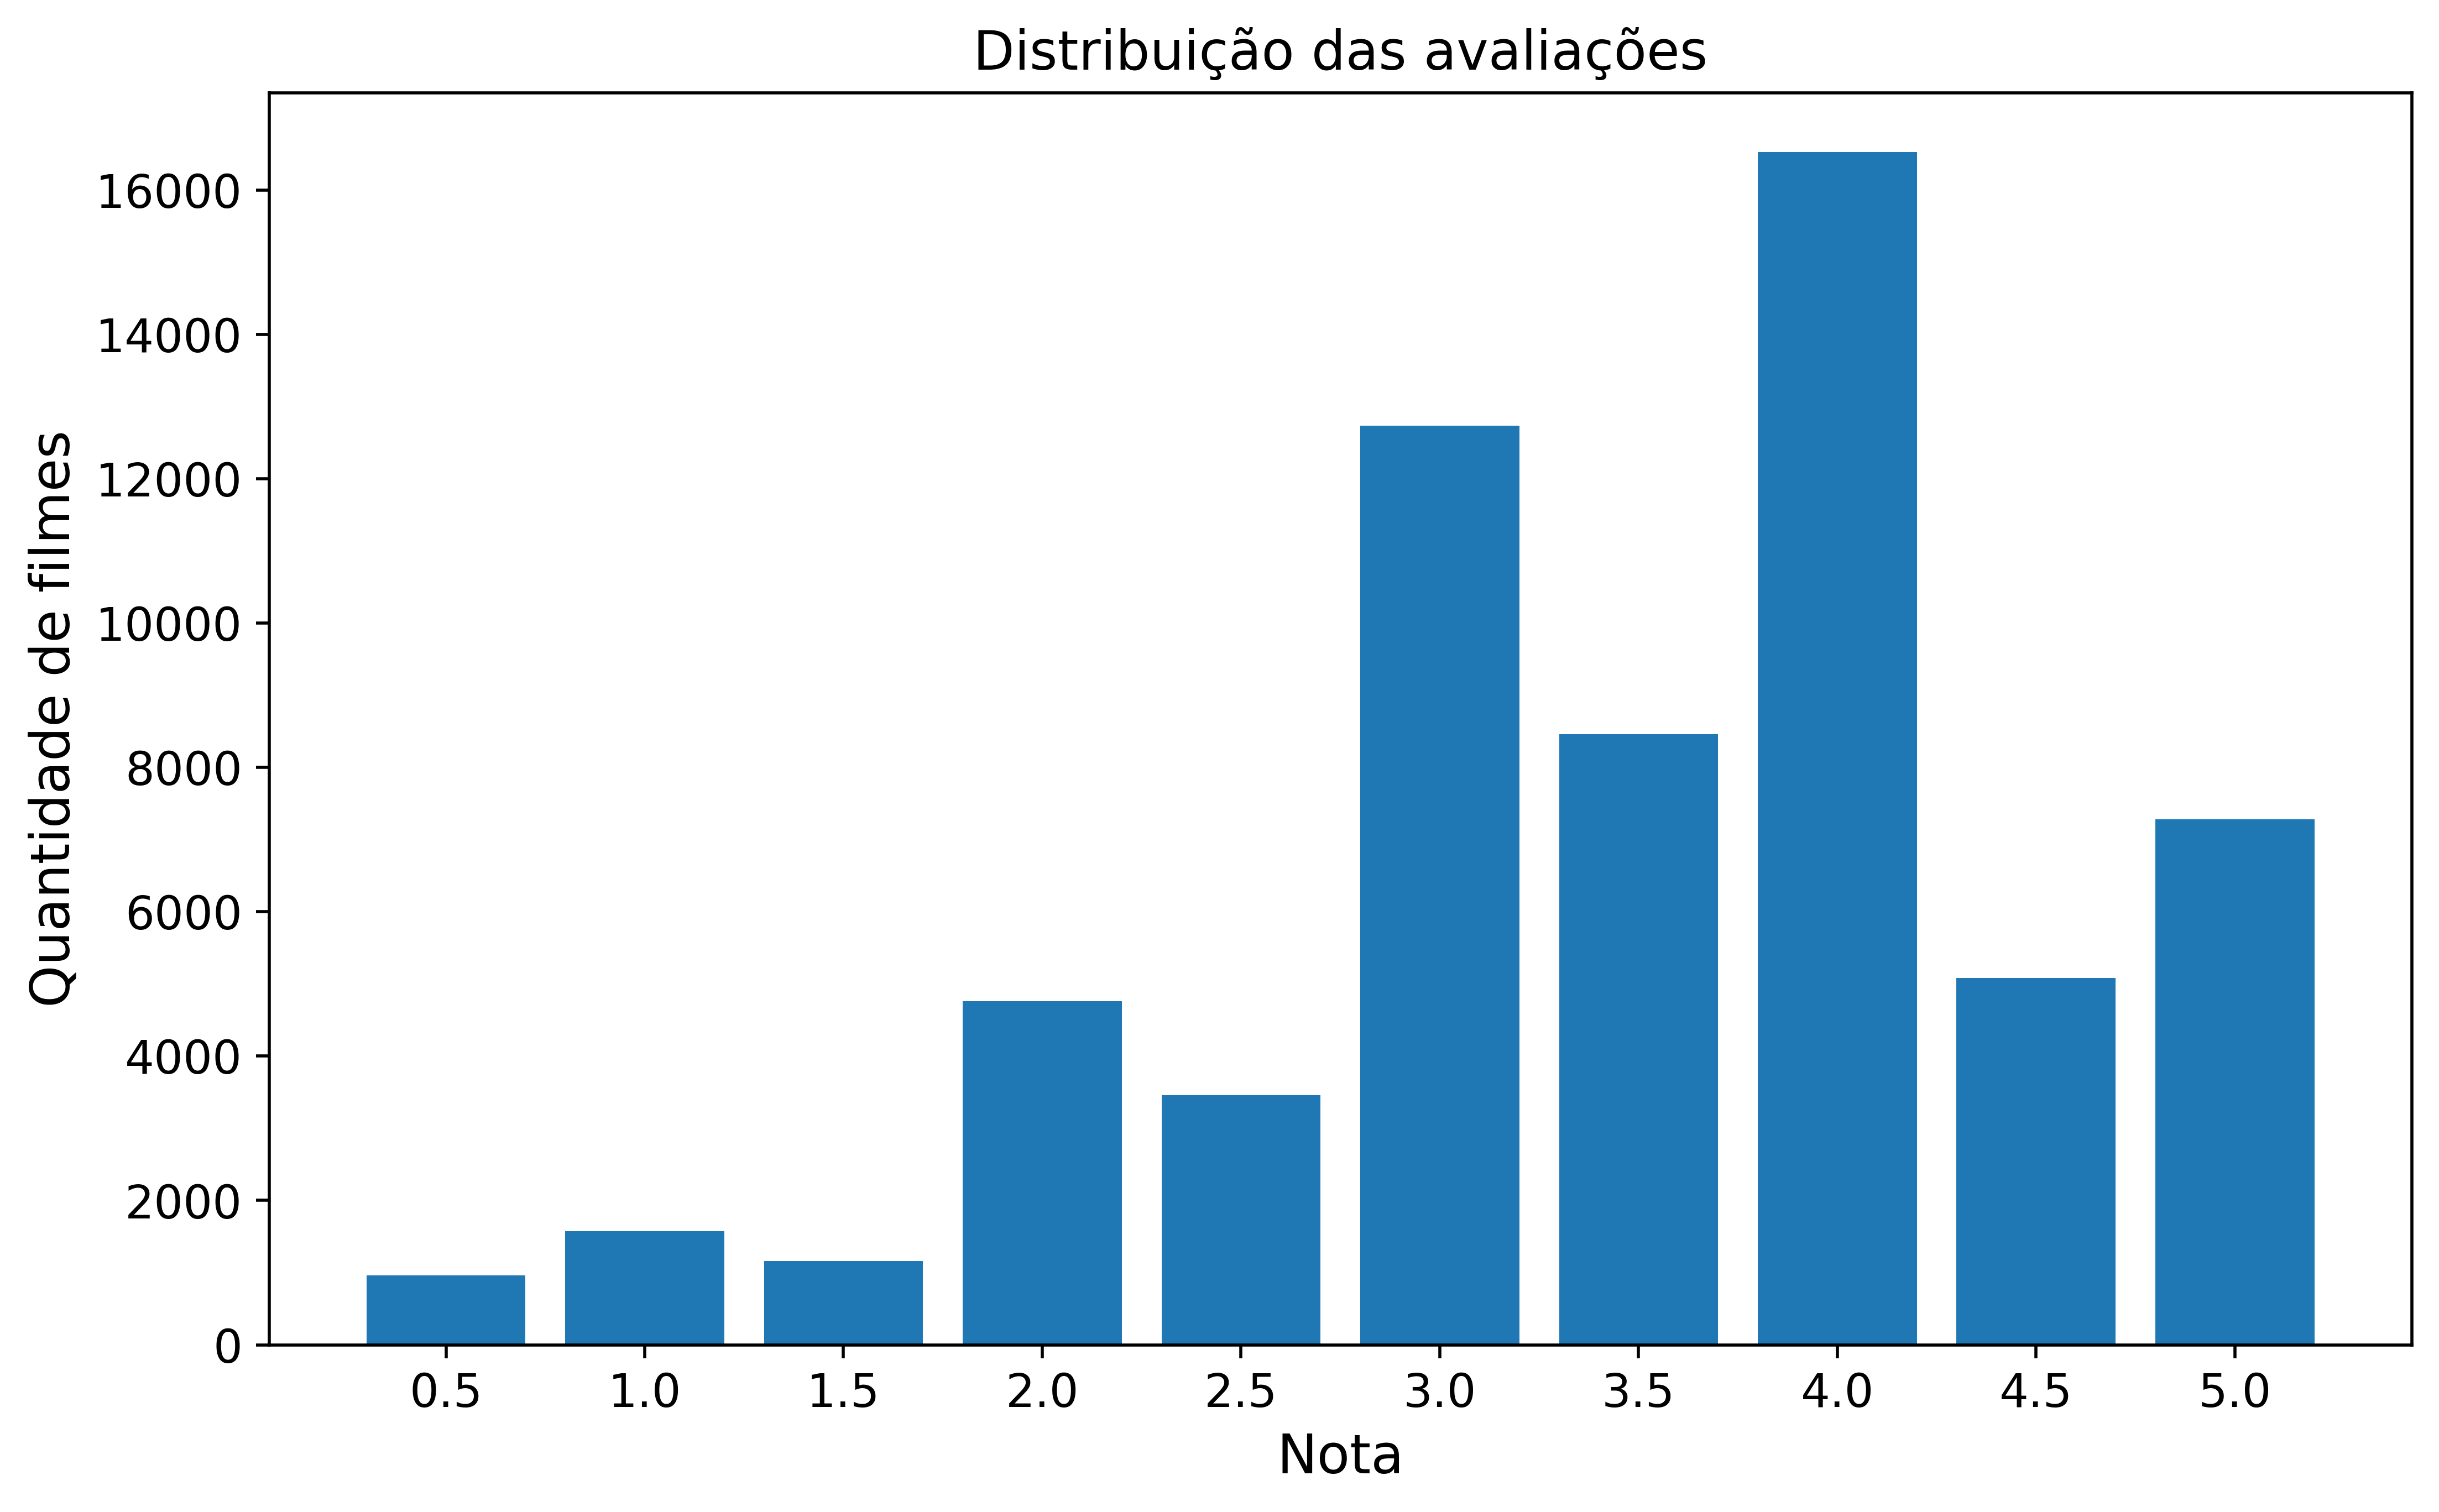

In [10]:
fig = plt.figure(figsize = (10,6), dpi=500)
ax = fig.gca()
freq = dict(Counter(dataset['rating']))
plt.bar(all_ratings, [freq[index] if index in freq else 0 for index in all_ratings], width=0.4)
plt.xlabel("Nota", fontsize=14)
plt.ylabel("Quantidade de filmes", fontsize=14)
plt.title("Distribuição das avaliações", fontsize=14)
plt.xticks(all_ratings, fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./ratings_distribution.png')
# plt.show()

In [8]:
users_average = dataset.groupby(['userId'], as_index=False).mean()[['userId', 'rating']]
movies_average = dataset.groupby(['movieId'], as_index=False).mean()[['movieId', 'rating']]

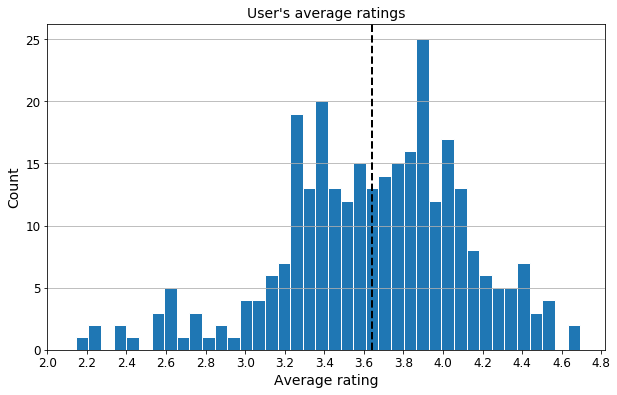

In [13]:
fig = plt.figure(figsize = (10,6))
ax = users_average['rating'].hist(bins=40, edgecolor='white', grid=False)
ax.set_xticks(np.arange(2, 5, step=0.2))
ax.axvline(users_average['rating'].mean(), color='k', linestyle='dashed', linewidth=2)
ax.grid(axis='y')
ax.set_title("User's average ratings", fontsize=14)
ax.set_xlabel("Average rating", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

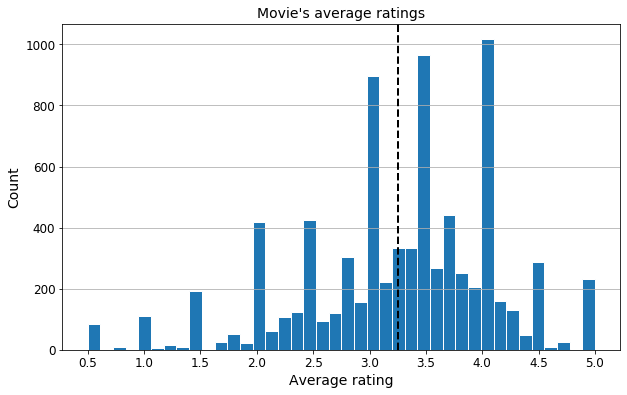

In [15]:
fig = plt.figure(figsize = (10,6))
ax = movies_average['rating'].hist(bins=40, edgecolor='white', grid=False)
ax.set_xticks(np.arange(0.5, 5.5, step=0.5))
ax.axvline(movies_average['rating'].mean(), color='k', linestyle='dashed', linewidth=2)
ax.grid(axis='y')
ax.set_title("Movie's average ratings", fontsize=14)
ax.set_xlabel("Average rating", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

In [12]:
users_rated = dataset.groupby(['userId'], as_index=False).count()[['userId', 'rating']]
movies_rated = dataset.groupby(['movieId'], as_index=False).count()[['movieId', 'rating']]

In [13]:
users_rated['rating'].std()

310.5098102166865

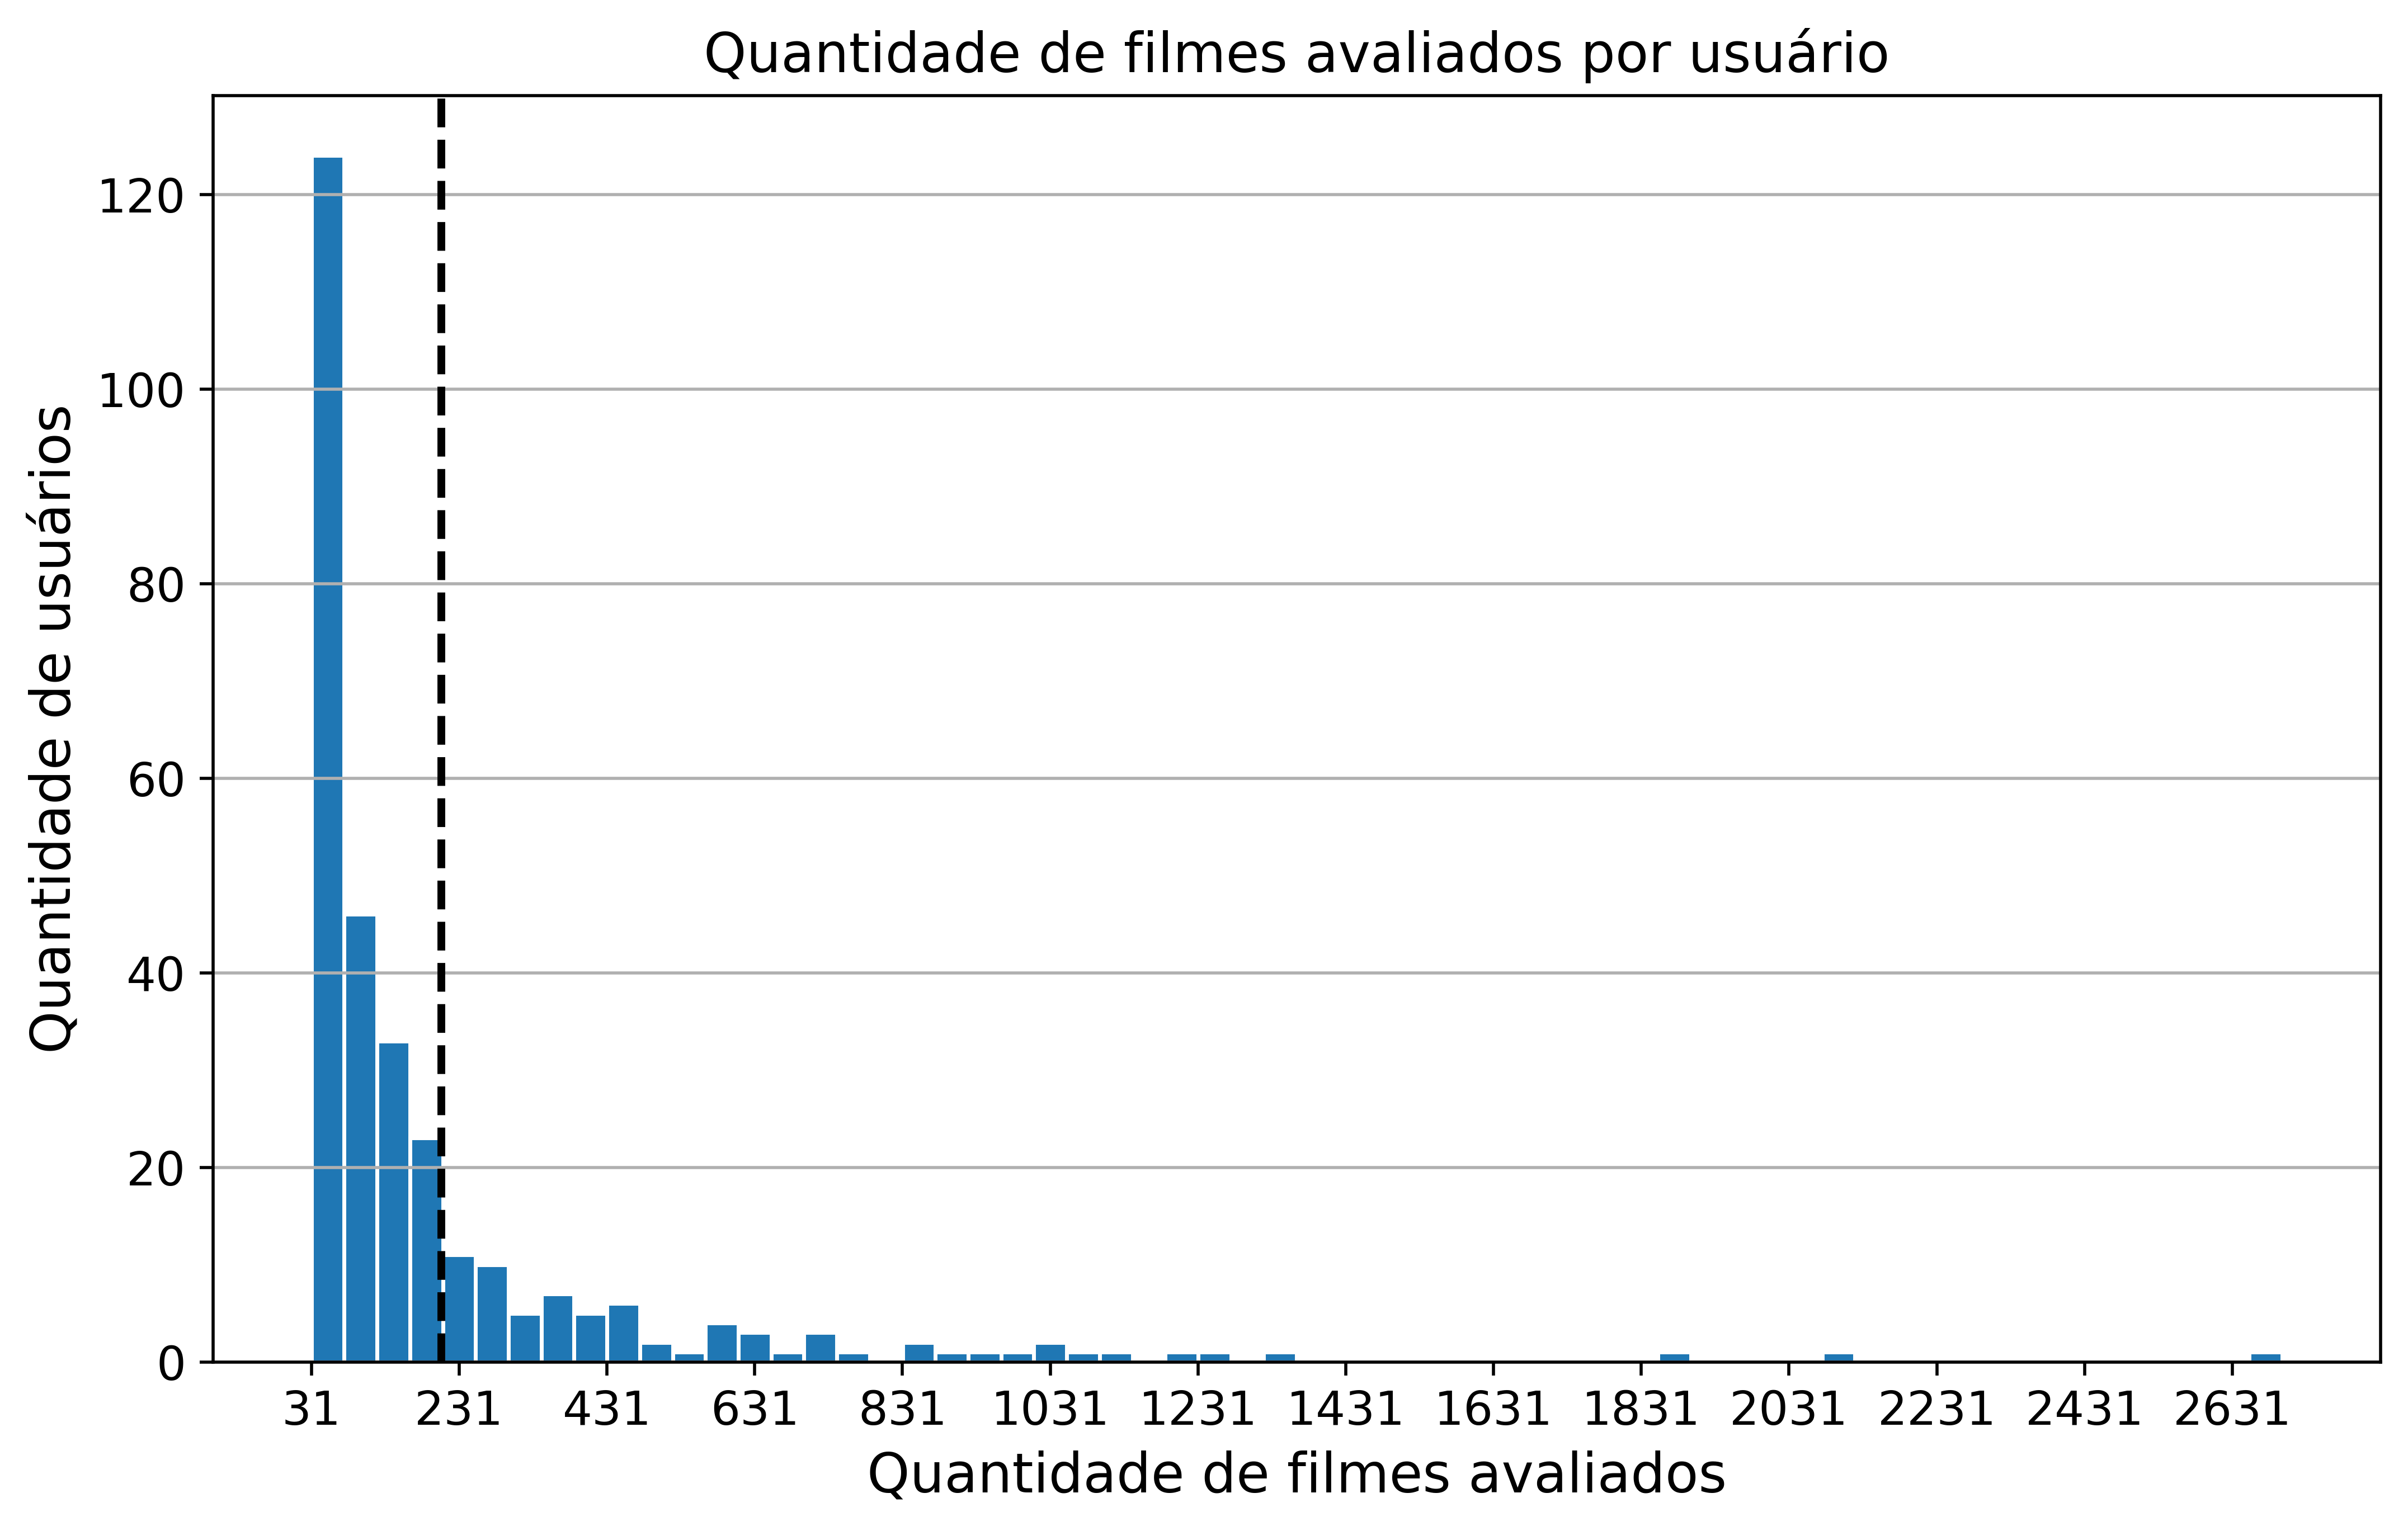

In [14]:
fig = plt.figure(figsize = (10,6), dpi=500)
ax = users_rated['rating'].hist(bins=60, edgecolor='white', grid=False)
ax.set_xticks(np.arange(users_rated['rating'].min(), users_rated['rating'].max(), step=200))
ax.axvline(users_rated['rating'].mean(), color='k', linestyle='dashed', linewidth=2)
ax.grid(axis='y')
ax.set_title("Quantidade de filmes avaliados por usuário", fontsize=14)
ax.set_xlabel("Quantidade de filmes avaliados", fontsize=14)
ax.set_ylabel("Quantidade de usuários", fontsize=14)
ax.tick_params(labelsize=12)
plt.savefig('./movies_rated_by_user.png')

In [58]:
users_rated['rating'].mean()

206.67

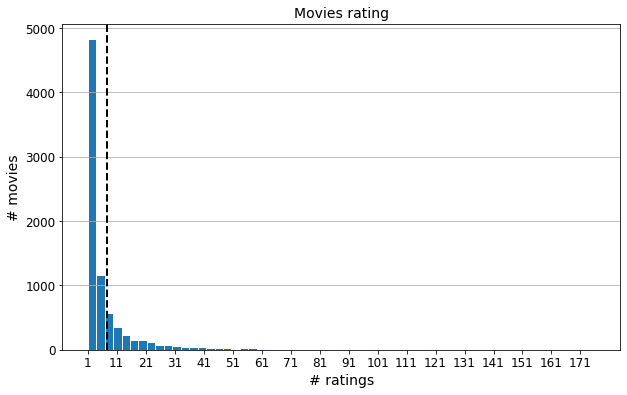

In [24]:
fig = plt.figure(figsize = (10,6))
ax = movies_rated['rating'].hist(bins=60, edgecolor='white', grid=False)
ax.set_xticks(np.arange(movies_rated['rating'].min(), movies_rated['rating'].max(), step=10))
ax.axvline(movies_rated['rating'].mean(), color='k', linestyle='dashed', linewidth=2)
ax.grid(axis='y')
ax.set_title("Movies rating", fontsize=14)
ax.set_xlabel("# ratings", fontsize=14)
ax.set_ylabel("# movies", fontsize=14)
ax.tick_params(labelsize=12)